In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("week2_dataset.xlsx")
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# Experience Analysis

In [3]:
#handling missing values
df['TCP DL Retrans. Vol (Bytes)'].fillna(value = df['TCP DL Retrans. Vol (Bytes)'].mean(), inplace = True)
df['TCP UL Retrans. Vol (Bytes)'].fillna(value = df['TCP UL Retrans. Vol (Bytes)'].mean(), inplace = True)
df['Avg RTT DL (ms)'].fillna(value = df['Avg RTT DL (ms)'].mean(), inplace = True)
df['Avg RTT UL (ms)'].fillna(value = df['Avg RTT UL (ms)'].mean(), inplace = True)
df['Avg Bearer TP DL (kbps)'].fillna(value = df['Avg Bearer TP DL (kbps)'].mean(), inplace = True)
df['Avg Bearer TP UL (kbps)'].fillna(value = df['Avg Bearer TP UL (kbps)'].mean(), inplace = True)
df["Handset Type"].fillna("No Handset", inplace = True)

In [20]:
# aggregating user per average TCp retransmission
df['TCP retransmission'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']
tcp_retransmissions = df.groupby('MSISDN/Number').agg({'TCP retransmission': ['sum']})
tcp_retransmissions.columns = ['Tcp Retransmission']
tcp_retransmissions.head()

,Tcp Retransmission
MSISDN/Number,
3.360100e+10,2.156957e+07
3.360100e+10,2.156957e+07
3.360100e+10,2.156957e+07
3.360101e+10,7.607247e+05
3.360101e+10,3.094040e+07


In [5]:
#Aggregating user RTT transmission
df['RTT average'] = df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']
RTT_average = df.groupby('MSISDN/Number').agg({'RTT average': ['sum']})
RTT_average.columns = ['RTT Average']
RTT_average.head()

,RTT Average
MSISDN/Number,
3.360100e+10,46.000000
3.360100e+10,31.000000
3.360100e+10,127.458589
3.360101e+10,84.000000
3.360101e+10,119.000000


In [6]:
#aggregating user per average throughput
df['Average Throughput'] = df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']
throughput_average = df.groupby('MSISDN/Number').agg({'Average Throughput': ['sum']})
throughput_average.columns = ['Throughput Average']
throughput_average.head()

,Throughput Average
MSISDN/Number,
3.360100e+10,76.0
3.360100e+10,99.0
3.360100e+10,97.0
3.360101e+10,248.0
3.360101e+10,56844.0


In [7]:
#outlier treatment with median on Tcp retransmission
print(df['TCP retransmission'].quantile(0.50)) 
print(df['TCP retransmission'].quantile(0.95)) 
df['TCP retransmission'] = np.where(df['TCP retransmission'] > 21569572.935152996, 21569572.935152996, df['TCP retransmission'])
# df.describe()

21569572.935152996
21569572.935152996


In [8]:
#outlier treatment on average throughput
print(df['Average Throughput'].quantile(0.50)) 
print(df['Average Throughput'].quantile(0.95)) 
df['Average Throughput'] = np.where(df['Average Throughput'] > 71093, 125, df['Average Throughput'])
# df.describe()

125.0
71093.0


In [9]:
#outlier treatment on average RTT
print(df['RTT average'].quantile(0.50)) 
print(df['RTT average'].quantile(0.95)) 
df['RTT average'] = np.where(df['RTT average'] > 273, 67, df['RTT average'])
#df.describe()

67.0
273.0


In [10]:
#aggregating user per handset type
user_handset = df.groupby('MSISDN/Number').agg({'Handset Type': ['count']})
user_handset.columns = ['User Handset']
user_handset.tail()

,User Handset
MSISDN/Number,
3.379000e+10,1
3.379000e+10,1
3.197021e+12,1
3.370000e+14,1
8.823971e+14,1


In [22]:
#Compute & list 10 of the top, bottom and most frequent
tcp_retransmissions.sort_values(by= 'Tcp Retransmission', ascending = False).head(10)

,Tcp Retransmission
MSISDN/Number,
3.366773e+10,8.354209e+09
3.365908e+10,7.941860e+09
3.366098e+10,7.374899e+09
3.376128e+10,6.043978e+09
3.376264e+10,5.879989e+09
3.365066e+10,5.593366e+09
3.366318e+10,5.566929e+09
3.366905e+10,5.195785e+09
3.376357e+10,5.179459e+09


In [21]:
#Compute & list 10 of the top, bottom and most frequent
tcp_retransmissions.sort_values(by= 'Tcp Retransmission', ascending = False).tail(10)

,Tcp Retransmission
MSISDN/Number,
3.369969e+10,182.0
3.367937e+10,179.0
3.378420e+10,177.0
3.365068e+10,176.0
3.376964e+10,176.0
3.360783e+10,143.0
3.362636e+10,134.0
3.376206e+10,129.0
3.361478e+10,128.0


In [23]:
tcp_retransmissions['Tcp Retransmission'].mode()

0    2.156957e+07
dtype: float64

In [14]:
#computing top10 RTT 
RTT_average.sort_values(by= 'RTT Average', ascending = False).head(10)

,RTT Average
MSISDN/Number,
3.366232e+10,96924.0
3.366087e+10,64670.0
3.368369e+10,54848.0
3.369855e+10,46021.0
3.376181e+10,37084.0
3.366879e+10,36304.0
3.376094e+10,27278.0
3.360679e+10,26300.0
3.367182e+10,25715.0


In [16]:
#computing bottom RTT
RTT_average.sort_values(by= 'RTT Average', ascending = False).tail(10)

,RTT Average
MSISDN/Number,
3.363468e+10,10.0
3.367220e+10,9.0
3.361085e+10,9.0
3.364768e+10,8.0
3.366862e+10,6.0
3.365949e+10,5.0
3.369505e+10,4.0
3.366020e+10,2.0
3.366158e+10,0.0


In [17]:
RTT_average['RTT Average'].mode()

0    127.458589
dtype: float64

In [18]:
#computing top 10 throughput
throughput_average.sort_values(by= 'Throughput Average', ascending = False).head(10)

,Throughput Average
MSISDN/Number,
3.376233e+10,902222.0
3.366871e+10,840424.0
3.365955e+10,798342.0
3.366995e+10,690815.0
3.366843e+10,676858.0
3.369817e+10,618797.0
3.362570e+10,564179.0
3.365808e+10,550352.0
3.376264e+10,549661.0


In [24]:
#computing bottom 10 throughput
throughput_average.sort_values(by= 'Throughput Average', ascending = False).tail(10)

,Throughput Average
MSISDN/Number,
3.366050e+10,0.0
3.365096e+10,0.0
3.363841e+10,0.0
3.369859e+10,0.0
3.375292e+10,0.0
3.377746e+10,0.0
3.377776e+10,0.0
3.366062e+10,0.0
3.366923e+10,0.0


In [25]:
throughput_average['Throughput Average'].mode()

0    15.0
dtype: float64

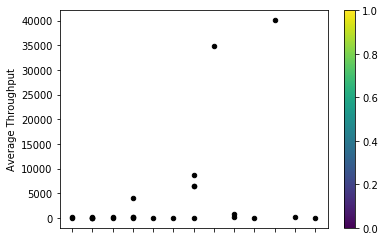

In [26]:
#distribution of the average throughput  per handset type 
df.head(25).plot.scatter(x='Handset Type', y='Average Throughput',c= 'black', colormap='viridis')

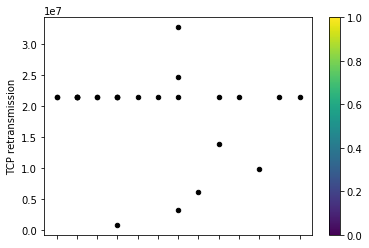

In [27]:
 #distribution of the TCP transmission per handset type 
df.head(25).plot.scatter(x='Handset Type', y='TCP retransmission',c= 'black', colormap='viridis')

In [29]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [30]:
#Using the experience metrics above, perform a k-means clustering 
exp_metrics = df[['TCP retransmission', 'Average Throughput', 'RTT average']]
min_max_scaler = preprocessing.MinMaxScaler()
exp_metrics2 = min_max_scaler.fit_transform(exp_metrics)
df_exp_metrics2 = pd.DataFrame(exp_metrics2 ,columns = ['Norm TCP', 'Norm Throughpt', 'Norm RTT'])
df_exp_metrics2.head()

,Norm TCP,Norm Throughpt,Norm RTT
0,0.004965,0.000942,0.172161
1,0.004965,0.000591,0.256410
2,0.004965,0.000211,0.466881
3,0.004965,0.001238,0.466881
4,0.004965,0.000211,0.466881


In [31]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=22)
kmeans.fit(df_exp_metrics2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=22, tol=0.0001, verbose=0)

In [32]:
#segment users into groups of experiences
df_exp_metrics2['kmean_label'] = kmeans.labels_
df_exp_metrics2.head()

,Norm TCP,Norm Throughpt,Norm RTT,kmean_label
0,0.004965,0.000942,0.172161,2
1,0.004965,0.000591,0.256410,2
2,0.004965,0.000211,0.466881,0
3,0.004965,0.001238,0.466881,0
4,0.004965,0.000211,0.466881,0


In [33]:
#segment users into groups of experiences
exp_metrics['kmean_label'] = kmeans.labels_
exp_metrics.head()

C:\Users\Jeannette\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TCP retransmission,Average Throughput,RTT average,kmean_label
0,2.156957e+07,67.0,47.000000,2
1,2.156957e+07,42.0,70.000000,2
2,2.156957e+07,15.0,127.458589,0
3,2.156957e+07,88.0,127.458589,0
4,2.156957e+07,15.0,127.458589,0


In [34]:
exp_metrics.to_csv('C:/Users/jeannette/Desktop/Experience_metrics.csv')